# 1. 2 variable logistic regression from scratch

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *

In [3]:
x_train = generate_multivariate_x(100, 2)
y_train = generate_binary_y(100)

# 1. Multivariate logistic regression from scratch

In [2]:
X_train = generate_multivariate_x(100, 5)
y_train = generate_binary_y(100)

In [3]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 100000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent_logistic(X_train, y_train, w_init, b_init, compute_cost_logistic, compute_gradient_logistic ,alpha, iterations)
print(f"b: {b_final:8.4f}")
for i in range(len(w_final)):
    print(f"w{i}: {w_final[i]:8.4f}") 

Iteration    0: Cost     0.68
Iteration  10000: Cost     0.36
Iteration  20000: Cost     0.29
Iteration  30000: Cost     0.27
Iteration  40000: Cost     0.25
Iteration  50000: Cost     0.24
Iteration  60000: Cost     0.23
Iteration  70000: Cost     0.22
Iteration  80000: Cost     0.22
Iteration  90000: Cost     0.21
b: -15.0954
w0:   0.7247
w1:   0.6401
w2:   0.4953
w3:   0.6461
w4:   0.6664


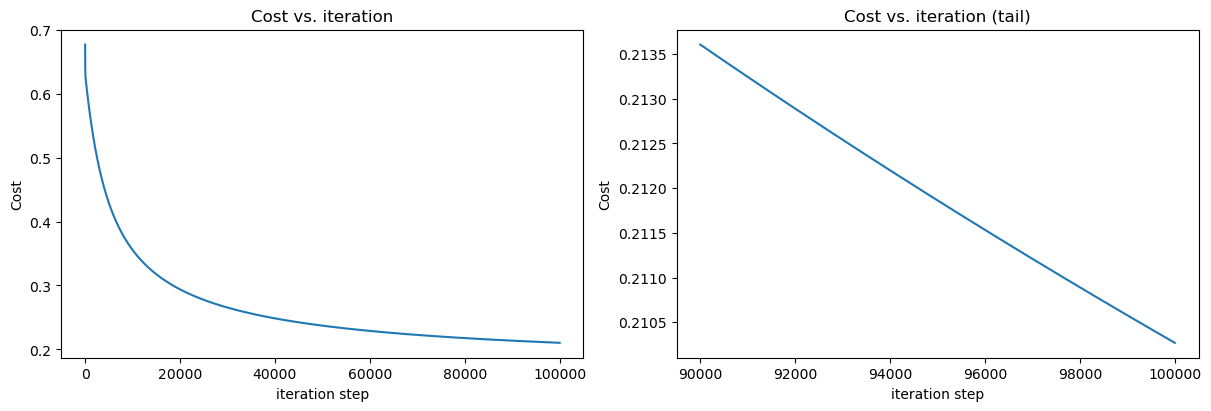

In [4]:
plt_hist(J_hist)
plt.show()

In [5]:
y_pred = sigmoid(np.dot(X_train, w_final) + b_final)
y_pred = np.where(y_pred > 0.5, 1, 0)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
cost = J_hist[-1]
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"Cost: {cost:8.4f}")

f1 score:   0.9143
accuracy:   0.9100
Cost:   0.2103


# 2. Multivariate logistic regression using sklearn

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score, accuracy_score

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
w_final = log_reg.coef_[0]
b_final = log_reg.intercept_[0]

print(f"b: {b_final:8.4f}")
for i in range(len(w_final)):
    print(f"w{i}: {w_final[i]:8.4f}")

b: -21.5870
w0:   1.0155
w1:   0.9018
w2:   0.7010
w3:   0.9143
w4:   0.9796


In [8]:
y_pred = log_reg.predict(X_train)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
cost = log_loss(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"cost: {cost:8.4f}")

f1 score:   0.9126
accuracy:   0.9100
cost:   3.1085
